In [1]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/projects/ae-vae-anomaly-detection/data/processed/cleaned.csv'

Mounted at /content/drive


In [4]:
!mkdir -p /content/src/models

In [5]:
import sys
sys.path.append('/content/src')

from models.ae_model import build_ae, train_autoencoder, plot_training_history

In [10]:
import pandas as pd

#load cleaned data
cleaned_df = pd.read_csv(data_path)
print(f'Loaded cleaned data: {cleaned_df.shape[0]} rows, {cleaned_df.shape[1]} columns')

# get a small sample for training model
df = cleaned_df.sample(frac=0.4, random_state=42)
print(f'Sampled data: {df.shape[0]} rows, {df.shape[1]} columns')

Loaded cleaned data: 640788 rows, 178 columns
Sampled data: 256315 rows, 178 columns


In [11]:
from sklearn.model_selection import train_test_split

# 1. Separate features and label
X = df.drop(columns='label')
y = df['label']

# 2. First split off a mixed test set (normal+anomaly), stratified to keep the same
#    anomaly ratio in train and test.
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 3. From the remaining (X_temp / y_temp) we only train on the normal samples:
#    i.e. drop the anomalies from this “train+val pool”
X_train_val = X_temp[y_temp == 0]

# 4. Finally split that normal‐only pool into X_train / X_val
X_train, X_val = train_test_split(
    X_train_val,
    test_size=0.2,
    random_state=42
)

# Now:
#  - X_train, X_val are both *only* normal samples (for AE/VAE training & early stopping)
#  - X_test / y_test is your held‐out mixed set (with both normal and anomalous),
#    and it never overlaps with X_train or X_val

In [12]:
# build model
autoencoder = build_ae(input_dim=X_train.shape[1])

# train model
history, best_model = train_autoencoder(autoencoder, X_train, X_val)

Epoch 1/100
2499/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0620 - mae: 0.1182

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0618 - mae: 0.1180 - val_loss: 0.0014 - val_mae: 0.0077 - learning_rate: 0.0010
Epoch 2/100
2499/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mae: 0.0115

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 0.0022 - mae: 0.0115 - val_loss: 8.8903e-04 - val_mae: 0.0066 - learning_rate: 0.0010
Epoch 3/100
2504/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mae: 0.0106

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0017 - mae: 0.0106 - val_loss: 7.0492e-04 - val_mae: 0.0062 - learning_rate: 0.0010
Epoch 4/100
2501/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0099

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0014 - mae: 0.0099 - val_loss: 5.5586e-04 - val_mae: 0.0055 - learning_rate: 0.0010
Epoch 5/100
2499/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0094

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0013 - mae: 0.0094 - val_loss: 4.6056e-04 - val_mae: 0.0048 - learning_rate: 0.0010
Epoch 6/100
2499/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0089

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.5697e-04 - val_mae: 0.0049 - learning_rate: 0.0010
Epoch 7/100
2502/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0087

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.3291e-04 - val_mae: 0.0048 - learning_rate: 0.0010
Epoch 8/100
2505/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0086

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.0011 - mae: 0.0086 - val_loss: 4.1925e-04 - val_mae: 0.0046 - learning_rate: 0.0010
Epoch 9/100
2505/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0086

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0011 - mae: 0.0086 - val_loss: 4.1893e-04 - val_mae: 0.0045 - learning_rate: 0.0010
Epoch 10/100
2502/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0086


Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0011 - mae: 0.0086 - val_loss: 4.0568e-04 - val_mae: 0.0045 - learning_rate: 0.0010
Epoch 11/100
2499/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - mae: 0.0083

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9001e-04 - val_mae: 0.0041 - learning_rate: 5.0000e-04
Epoch 12/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9889e-04 - val_mae: 0.0043 - learning_rate: 5.0000e-04
Epoch 13/100
2501/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - mae: 0.0083
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9188e-04 - val_mae: 0.0041 - learning_rate: 5.0000e-04
Epoch 14/100
2496/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - mae: 0.0082

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 0.0010 - mae: 0.0082 - val_loss: 3.7442e-04 - val_mae: 0.0040 - learning_rate: 2.5000e-04
Epoch 15/100
2504/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9527e-04 - mae: 0.0082

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 9.9528e-04 - mae: 0.0082 - val_loss: 3.7236e-04 - val_mae: 0.0041 - learning_rate: 2.5000e-04
Epoch 16/100
2500/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9828e-04 - mae: 0.0082


Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 9.9828e-04 - mae: 0.0082 - val_loss: 3.5603e-04 - val_mae: 0.0040 - learning_rate: 2.5000e-04
Epoch 17/100
2499/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - mae: 0.0082

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0010 - mae: 0.0082 - val_loss: 3.5162e-04 - val_mae: 0.0039 - learning_rate: 1.2500e-04
Epoch 18/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 9.8796e-04 - mae: 0.0082 - val_loss: 3.5692e-04 - val_mae: 0.0039 - learning_rate: 1.2500e-04
Epoch 19/100
2500/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9440e-04 - mae: 0.0082


Epoch 19: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 9.9440e-04 - mae: 0.0082 - val_loss: 3.5092e-04 - val_mae: 0.0039 - learning_rate: 1.2500e-04
Epoch 20/100
2497/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.9814e-04 - mae: 0.0082

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 9.9811e-04 - mae: 0.0082 - val_loss: 3.4962e-04 - val_mae: 0.0038 - learning_rate: 6.2500e-05
Epoch 21/100
2497/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.8735e-04 - mae: 0.0082

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 9.8737e-04 - mae: 0.0082 - val_loss: 3.4537e-04 - val_mae: 0.0037 - learning_rate: 6.2500e-05
Epoch 22/100
2503/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8920e-04 - mae: 0.0082


Epoch 22: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 9.8920e-04 - mae: 0.0082 - val_loss: 3.4395e-04 - val_mae: 0.0038 - learning_rate: 6.2500e-05
Epoch 23/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8561e-04 - mae: 0.0082

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 9.8561e-04 - mae: 0.0082 - val_loss: 3.4319e-04 - val_mae: 0.0038 - learning_rate: 3.1250e-05
Epoch 24/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 9.8605e-04 - mae: 0.0081 - val_loss: 3.4358e-04 - val_mae: 0.0037 - learning_rate: 3.1250e-05
Epoch 25/100
2505/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8202e-04 - mae: 0.0081
Epoch 25: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 9.8202e-04 - mae: 0.0081 - val_loss: 3.4806e-04 - val_mae: 0.0038 - learning_rate: 3.1250e-05
Epoch 26/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 9.8315e-04 - mae: 0.0081 - val_loss: 3.4626e-04 - val_mae: 0.0038 - learning_rate: 1.5625e-05
Epoch 27/100
2504/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.8144e-04 - mae: 0.0081

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 9.8144e-04 - mae: 0.0081 - val_loss: 3.3918e-04 - val_mae: 0.0038 - learning_rate: 1.5625e-05
Epoch 28/100
2501/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7845e-04 - mae: 0.0081
Epoch 28: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 9.7847e-04 - mae: 0.0081 - val_loss: 3.4466e-04 - val_mae: 0.0038 - learning_rate: 1.5625e-05
Epoch 29/100
2504/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8073e-04 - mae: 0.0081

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 9.8074e-04 - mae: 0.0081 - val_loss: 3.3838e-04 - val_mae: 0.0038 - learning_rate: 7.8125e-06
Epoch 30/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 9.7567e-04 - mae: 0.0081 - val_loss: 3.4189e-04 - val_mae: 0.0038 - learning_rate: 7.8125e-06
Epoch 31/100
2500/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8673e-04 - mae: 0.0082
Epoch 31: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 9.8672e-04 - mae: 0.0082 - val_loss: 3.4446e-04 - val_mae: 0.0038 - learning_rate: 7.8125e-06
Epoch 32/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - loss: 9.7591e-04 - mae: 0.0081 - val_loss: 3.4363e-04 - val_mae: 0.0037 - learning_rate: 3.9063e-06
Epoch 33/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 9.8242e-04 - mae: 0.0081 - val_loss: 3.4163e-04 - val_mae: 0.0038 - learning_rate: 3.9063e-06
Epoch 34/100
2503/2506 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9

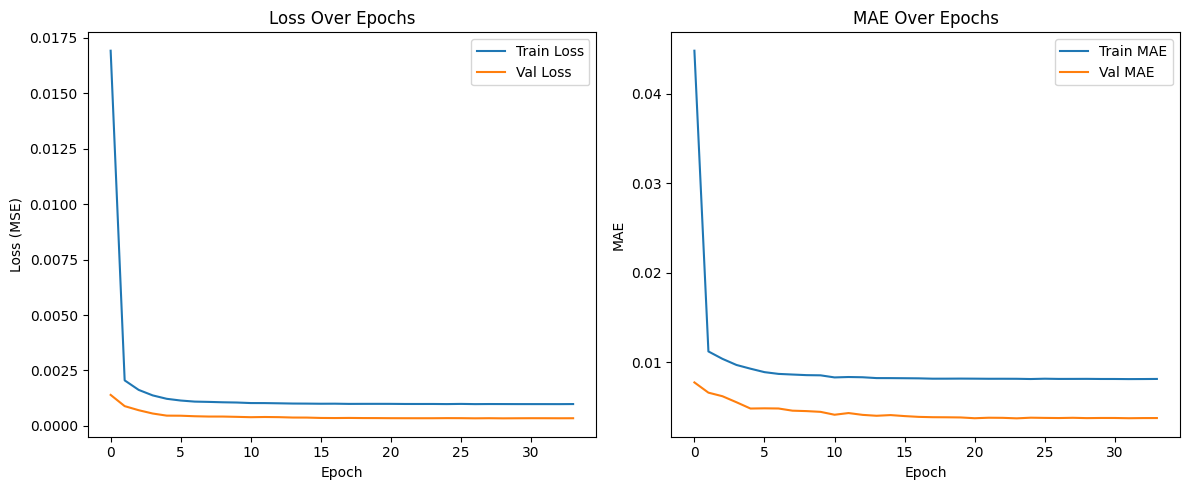

✅ Training plot saved as: ae_training_plot.png


In [13]:
# 显示并保存图像,图像将保存在当前 Colab 工作目录中（可从左侧「Files」下载）
plot_training_history(history, save_path='ae_training_plot.png')

In [14]:
from models.ae_evaluation import compute_reconstruction_error, evaluate_anomaly_detection, plot_reconstruction_error_distribution, visualize_reconstruction

In [16]:
re = compute_reconstruction_error(best_model, X_test)

1602/1602 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [17]:
evaluate_anomaly_detection(re, y_test)

{'threshold': np.float64(0.0038880698589491753),
 'precision': np.float64(0.6046137339055794),
 'recall': np.float64(0.9860017497812773),
 'f1': np.float64(0.7495843032451925),
 'roc_auc': np.float64(0.9909816615101882),
 'confusion_matrix': {'TP': np.int64(1127),
  'FP': np.int64(737),
  'TN': np.int64(49383),
  'FN': np.int64(16)}}

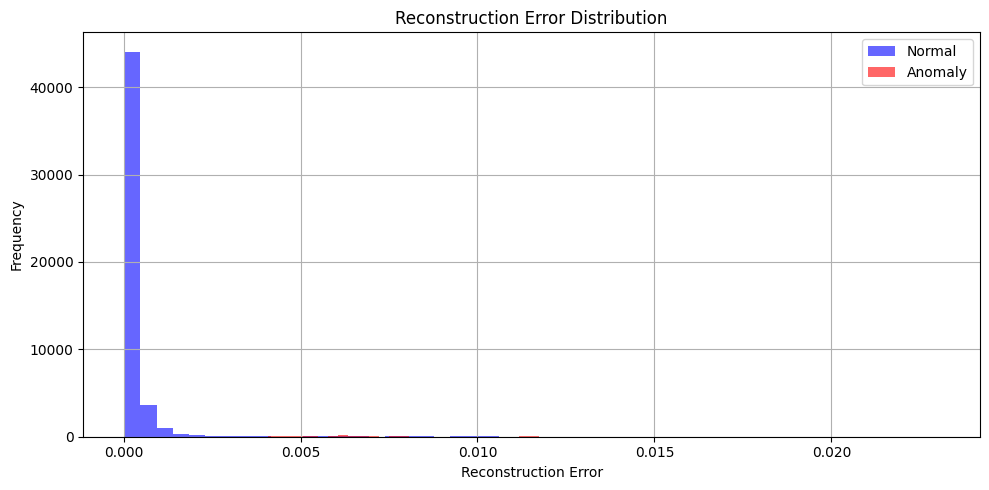

In [18]:
plot_reconstruction_error_distribution(re, y_test)

1602/1602 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


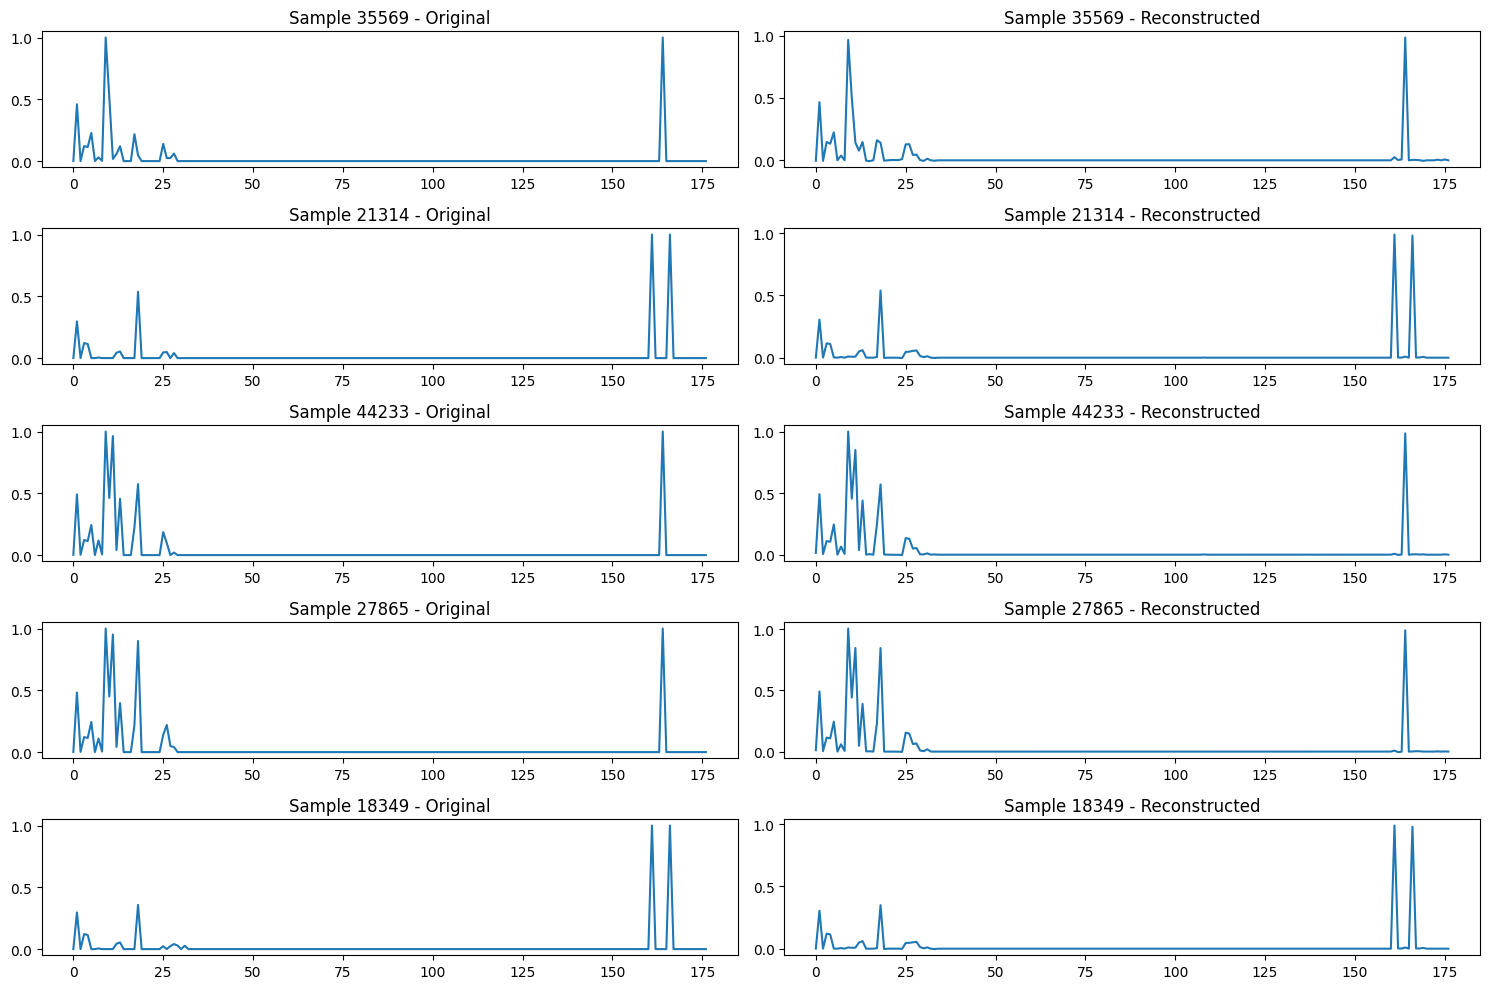

In [20]:
visualize_reconstruction(best_model, X_test.to_numpy())